In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime

In [18]:
dt = pd.read_csv("beetroot_Price.csv")


In [19]:
dt["recorded_date"] = pd.to_datetime(dt["recorded_date"])
dt["day"] = dt['recorded_date'].map(lambda x: x.day)
dt["month"] = dt['recorded_date'].map(lambda x: x.month)
dt["year"] = dt['recorded_date'].map(lambda x: x.year)
dt["quarter"] = dt["recorded_date"].map(lambda x: x.quarter)
dt["year-month"] = dt["recorded_date"].apply(lambda x: x.replace(day=1))
dt["consecutive_day"] = (dt["recorded_date"] - dt["recorded_date"].min()).map(lambda x: x.days)

dt["small_ratio"] = dt["small_hass_sales"] / dt["total_sales_volume"]
dt["large_ratio"] = dt["large_hass_sales"] / dt["total_sales_volume"]
dt["xl_ratio"] = dt["xl_hass_sales"] / dt["total_sales_volume"]
dt["bagged_ratio"] = dt["bagged_sales_total"] / dt["total_sales_volume"]

dt['half_year'] = dt['quarter'].apply(lambda x: 1 if x <= 2 else 2)

dt["total_income"] = dt["avg_price"] * dt["total_sales_volume"]



C:\Users\Иван\AppData\Local\Temp\ipykernel_9544\558378358.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt["recorded_date"] = pd.to_datetime(dt["recorded_date"])


In [20]:
def scatter(df, col1, col2):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col1], 
                df[col2], alpha=0.6)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [21]:

def test_for_normal(col):
    plt.figure(figsize=(15, 7))

    mean = col.mean()
    var = col.var()
    cmin = col.min()
    cmax = col.max()
    price_arange = np.arange(cmin, cmax, 0.05)
    plt.subplot(1, 2, 1)
    col.hist(bins=40, density=True)
    plt.plot(price_arange, stats.norm.pdf(price_arange, mean, np.sqrt(var)), label="Нормальное распределение")
    plt.legend()
    # print(stats.normaltest(stats.norm.pdf(price_arange, mean, np.sqrt(var))))

    plt.subplot(1, 2, 2)
    plt.title("Q-Q кривая")
    loc = col.mean()
    scale = col.std()
    
    interval = np.linspace(0, 1, col.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(col, interval)
    
    plt.scatter(x, y, s=5)
    plt.plot(x, x, color='C1', linestyle='dashed')
    
    plt.xlabel('теоретические квантили')
    plt.ylabel('квантили выборки')

    plt.tight_layout()

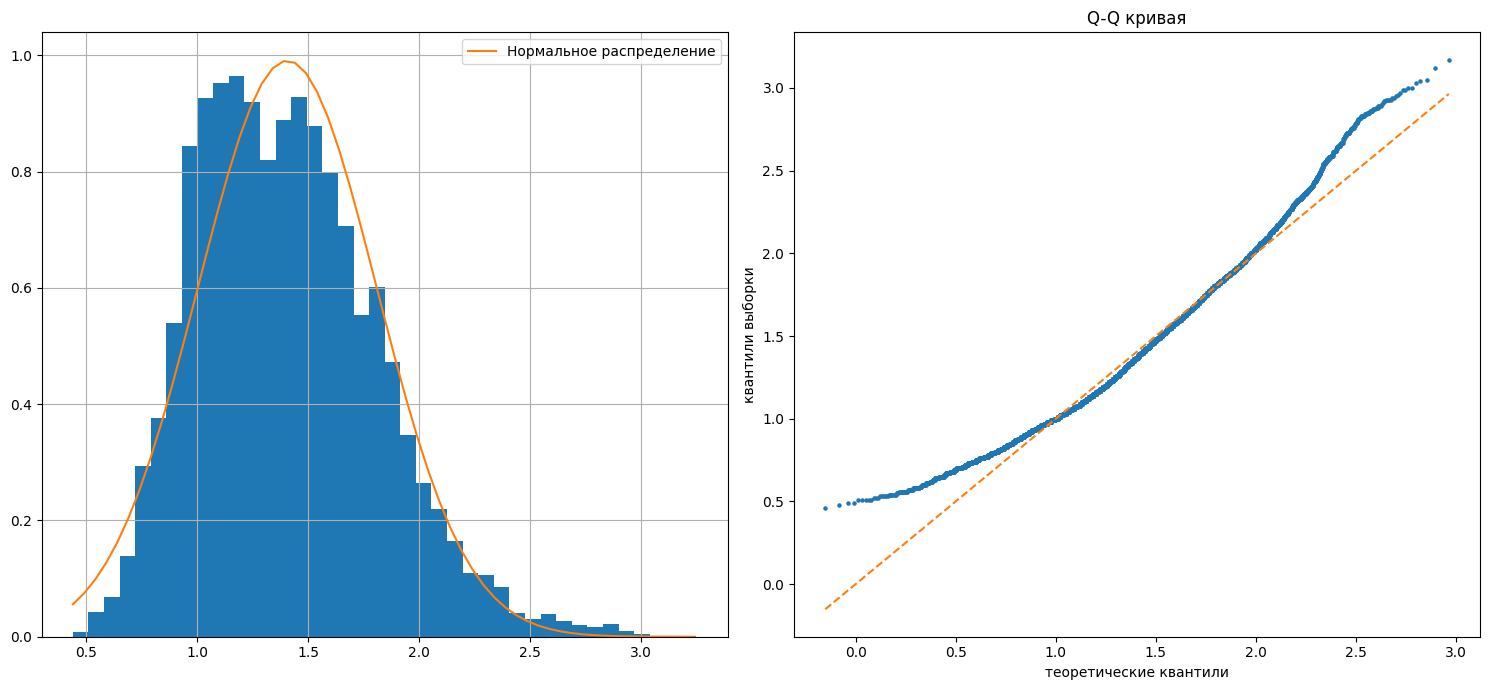

In [22]:
test_for_normal(dt["avg_price"])

Найдено 209 выбросов цен для avg_price
Найдено 2297 выбросов цен для total_sales_volume


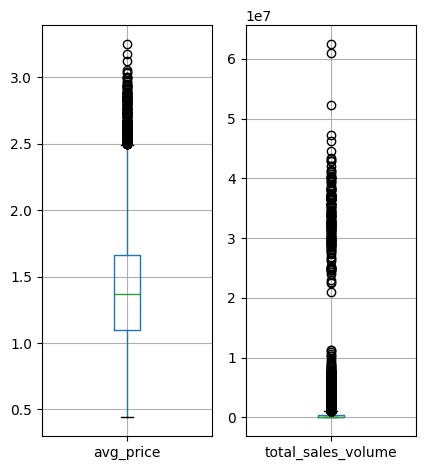

In [23]:
def boxplots(df):
    plt.subplot(1, 3, 1)
    df[["avg_price"]].boxplot()
    plt.subplot(1, 3, 2)
    df[["total_sales_volume"]].boxplot()
    plt.tight_layout()

def check_for_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Найдено {len(outliers)} выбросов цен для {col}")


boxplots(dt)
check_for_outliers(dt, "avg_price")
check_for_outliers(dt, "total_sales_volume")


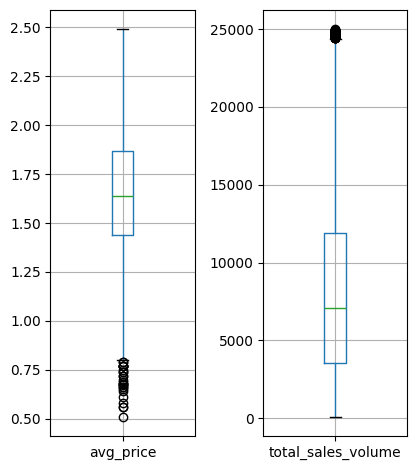

In [24]:
new_dt = dt[:]
new_dt = new_dt[new_dt["avg_price"] < 2.5]
new_dt = new_dt[new_dt["total_sales_volume"] < 25000]
boxplots(new_dt)

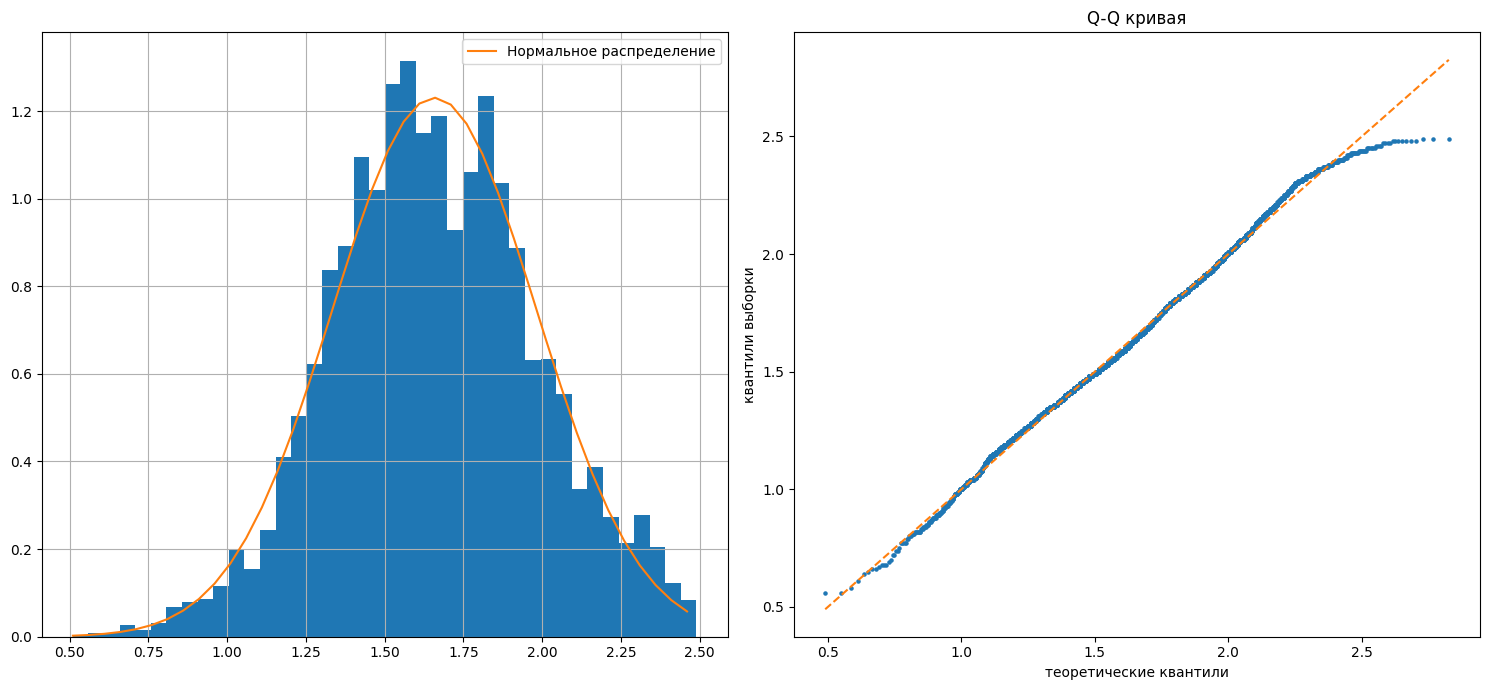

In [25]:
test_for_normal(new_dt["avg_price"])
dt = new_dt[:]

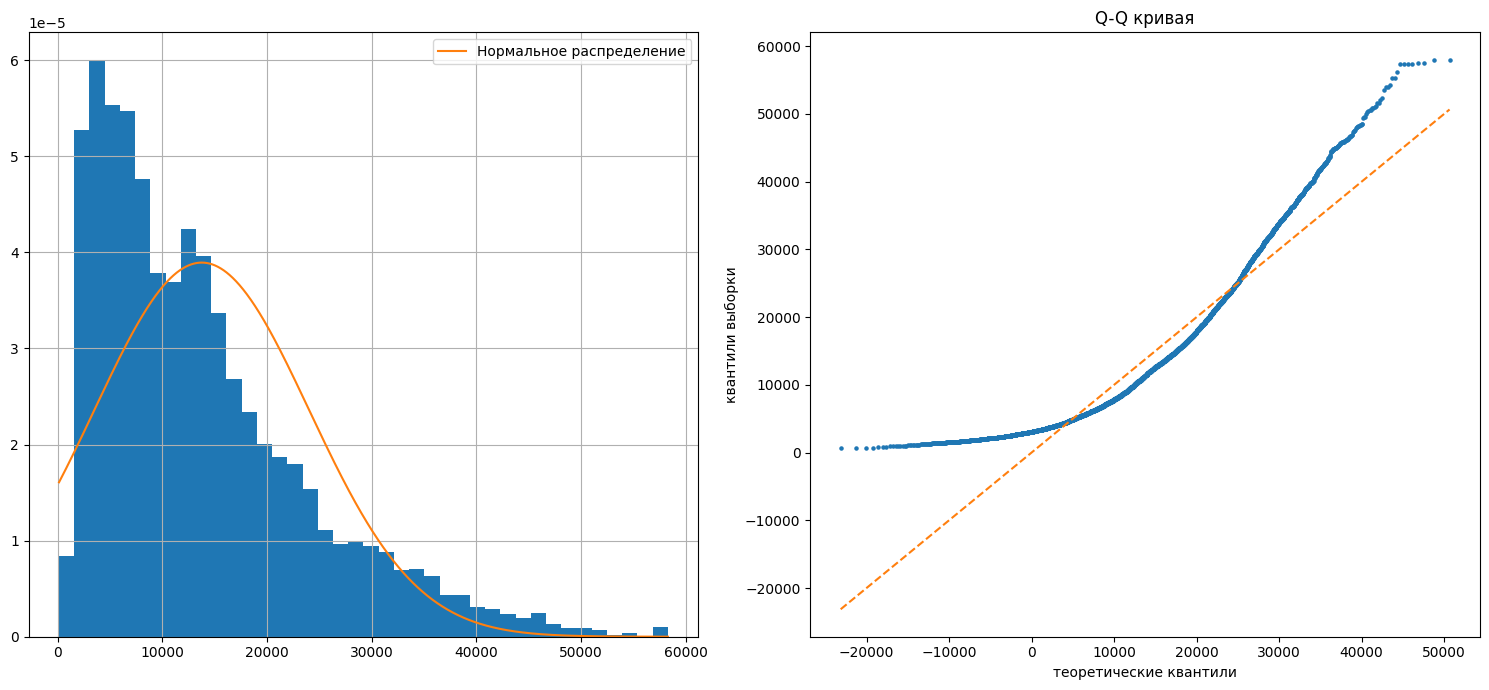

In [26]:
test_for_normal(dt["total_income"])

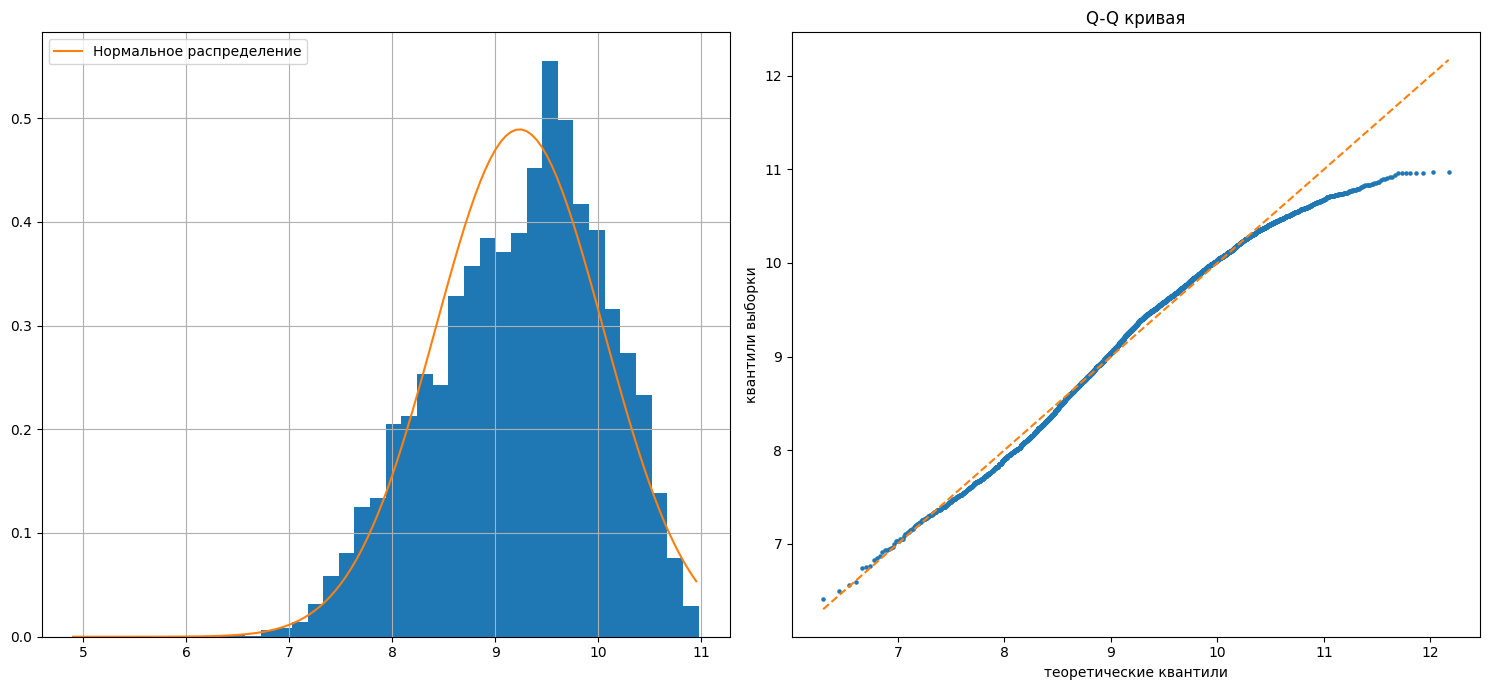

In [27]:
test_for_normal(np.log(dt["total_income"]))

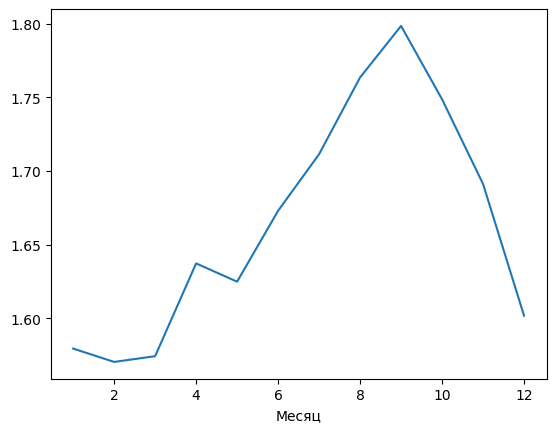

In [28]:
monthly_avg = dt.groupby('month')['avg_price'].mean()
plt.xlabel("Месяц")
plt.plot(monthly_avg)


In [29]:
corr = dt[["avg_price", "total_sales_volume"]].corr()
corr.style.background_gradient(cmap="coolwarm").format(precision=3)

,avg_price,total_sales_volume
avg_price,1.000,-0.124
total_sales_volume,-0.124,1.000
